### All about the Imports

In [1]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")
import time
from bs4 import BeautifulSoup
import requests 
import seaborn as sns

In [2]:
directors = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz', compression = 'gzip')

In [3]:
directors.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
#format profession to list
directors['primary_profession'] = directors['primary_profession'].str.split(',').tolist()
directors = directors.dropna(subset = ['primary_profession'])

In [5]:
#test for primary profession including director
def is_director(dir_list):
    if 'director' in dir_list:
        return True;
    else:
        return False;

directors['is_director'] = directors['primary_profession'].apply(is_director)

In [6]:
#remove non directors
directors = directors.loc[directors['is_director']==True]



In [7]:
#format known for titles to list
directors['known_for_titles'] = directors['known_for_titles'].str.split(',').tolist()
directors.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,is_director
5,nm0062879,Ruel S. Bayani,NaN,NaN,"[director, production_manager, miscellaneous]","[tt2590280, tt0352080, tt0216559, tt2057445]",True
10,nm0064023,Bryan Beasley,NaN,NaN,"[director, producer, writer]","[tt3501180, tt1485100, tt1358897, tt1387162]",True
15,nm0066163,Arnaud Bedouët,NaN,NaN,"[actor, writer, director]","[tt1355327, tt1977735, tt0173525, tt1710520]",True
16,nm0066268,Steve Mitchell Beebe,NaN,NaN,"[editorial_department, director, editor]","[tt0827928, tt0119961, tt0408417, tt5521860]",True
21,nm0068170,Dylan Bell,NaN,NaN,"[director, actor, producer]","[tt4655766, tt3180116, tt8170168, tt4082762]",True


In [8]:
#get directors by movie, remove Na
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz',compression = 'gzip')
title_crew = title_crew.dropna(subset = ['directors'])

In [9]:
film_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz',compression = 'gzip')


In [10]:
#filter name information to only include original titles
film_akas = film_akas.loc[film_akas['is_original_title'] == 1]
film_akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44700 entries, 38 to 331700
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           44700 non-null  object 
 1   ordering           44700 non-null  int64  
 2   title              44700 non-null  object 
 3   region             6 non-null      object 
 4   language           4 non-null      object 
 5   types              44700 non-null  object 
 6   attributes         0 non-null      object 
 7   is_original_title  44700 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [11]:
#remove data from title_crew not in film AKAS
title_id_unique = set(film_akas['title_id'])
def is_film_id(in_string):
    if in_string in title_id_unique:
        return True;
    else:
        return False


title_crew['is_film'] = title_crew['tconst'].apply(is_film_id)
title_crew = title_crew.loc[title_crew['is_film'] == True]

In [12]:
#clean NaN values, reformat data
title_crew = title_crew.dropna(subset=['directors'])
title_crew = title_crew.explode('directors')

In [13]:
#remove directors from directors if not in title_crew
title_crew_unique = set(title_crew['directors'])
def is_movie_director(in_string):
    if in_string in title_crew_unique:
        return True;
    else:
        return False;


directors['is_film_director'] = directors['nconst'].apply(is_movie_director)
directors.head()
directors.loc[directors['is_film_director']==True]


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,is_director,is_film_director
5,nm0062879,Ruel S. Bayani,NaN,NaN,"[director, production_manager, miscellaneous]","[tt2590280, tt0352080, tt0216559, tt2057445]",True,True
30,nm0070482,Joel Bender,1948.0,NaN,"[editor, director, writer]","[tt1454573, tt0077597, tt4637900, tt0424938]",True,True
42,nm0075666,Joe Berlinger,1961.0,NaN,"[producer, director, camera_department]","[tt0117293, tt0103888, tt6794462, tt0387412]",True,True
56,nm0082154,Miro Bilbrough,NaN,NaN,"[miscellaneous, director, writer]","[tt0424880, tt0337841, tt0107822, tt0380364]",True,True
76,nm0087933,Jacek Blawut,1950.0,NaN,"[cinematographer, miscellaneous, director]","[tt1101672, tt1210349, tt0263792, tt0421774]",True,True
...,...,...,...,...,...,...,...,...
606287,nm9493181,Sirithunga Perera,NaN,NaN,"[writer, director, actor]","[tt7760082, tt7964174, tt8200480]",True,True
606361,nm9541799,Hamed Saleh,NaN,NaN,"[director, writer, producer]",NaN,True,True
606489,nm9748617,Frank W Chen,NaN,NaN,"[director, camera_department, music_department]",[tt8234502],True,True
606523,nm9781362,Grzegorz Jankowski,NaN,NaN,"[director, writer, producer]","[tt4438688, tt1674050, tt0441074]",True,True


In [14]:
#get and format moentary information


df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df["production_budget"] = df["production_budget"].str.replace(",","").str.replace("$","").astype(int)
df["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['return_rate'] = df['profit']/df['production_budget']

In [15]:
#format title information
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz',compression = 'gzip')
title_basics = title_basics.drop(['start_year','runtime_minutes','genres'], axis = 1)
title_basics = title_basics.set_index('primary_title')
title_basics.head()

,tconst,original_title
primary_title,,
Sunghursh,tt0063540,Sunghursh
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din
The Other Side of the Wind,tt0069049,The Other Side of the Wind
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh
The Wandering Soap Opera,tt0100275,La Telenovela Errante


In [16]:
#translate movie name into index
def get_tconst(primary_title):
    if primary_title in title_basics.index:
        return title_basics['tconst'][primary_title];
    else:
        return np.NaN;
    


df['tconst'] = df['movie'].apply(get_tconst)

In [17]:
df = df.dropna(subset=['tconst'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 0 to 5780
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2376 non-null   int64  
 1   release_date       2376 non-null   object 
 2   movie              2376 non-null   object 
 3   production_budget  2376 non-null   int64  
 4   domestic_gross     2376 non-null   int64  
 5   worldwide_gross    2376 non-null   int64  
 6   profit             2376 non-null   int64  
 7   return_rate        2376 non-null   float64
 8   tconst             2376 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 185.6+ KB


In [18]:
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz',compression = 'gzip')
title_crew = title_crew.dropna(subset = ['directors'])
title_crew = title_crew.set_index('tconst')



In [19]:
#use movie inde to get director index
valid_tconst = title_crew.index.to_list();
def get_nconst(t_value):
    check = t_value
    if type(t_value) == str:   
        if check in valid_tconst:
            return title_crew['directors'][t_value];
        else:
            return np.NaN;
    else:
        return np.NaN

df['nconst'] = df['tconst'].apply(get_nconst)
df = df.dropna(subset = ['nconst'])

In [20]:
#reformat director index
df['nconst'] = df['nconst'].str.split(',').tolist()
df.head()
df = df.explode('nconst')
df = df.dropna(subset = ['nconst'])

In [21]:
df = df.explode('nconst')
df.head(6)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,tconst,nconst
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,tt1775309,nm3786927
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,tt1298650,nm0551128
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,tt6565702,nm1334526
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,tt2395427,nm0923736
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114,tt4154756,nm0751577
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114,tt4154756,nm0751648


In [22]:
#fetch known for titles by director
directors = directors.set_index('nconst')
valid_nconst = directors.index.to_list();
def get_known(n_value):
    if type(n_value) == str:   
        if n_value in valid_nconst:
            return directors['known_for_titles'][n_value];
        else:
            return np.NaN;
    else:
        return np.NaN

df['know_for_title'] = df['nconst'].apply(get_known)

df = df.dropna(subset = ['know_for_title'])


In [23]:
title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz',compression = 'gzip');
title_ratings = title_ratings.set_index('tconst');
ratings_valid = title_ratings.index.to_list()

In [24]:
#get known ratingd for each known for title
def get_ratings_1(in_list):
    outlist = []

    if in_list == 0:
        return np.NaN
    for i in in_list:
        if i in ratings_valid:
            in_out = title_ratings['averagerating'][i];
            has_movie = True
        else:
            in_out = i;
        outlist.append(in_out)
    return outlist;
df['known_ratings'] = df['know_for_title'].apply(get_ratings_1)

In [25]:
df.loc[df['known_ratings']==0,'known_ratings']=np.NaN
df = df.dropna(subset = ['known_ratings'])


In [26]:
'''#for unknown ratings, scrape the data from impb
def scrape_rate(id_list):
    out = []
    try:
        for i in id_list:
            if i[0:2] == 'tt':
                url = f'https://www.imdb.com/title/{i}/'
                response = requests.get(url);
                soup = BeautifulSoup(response.text, 'lxml')
                title = soup.find('span', class_='AggregateRatingButton__RatingScore-sc-1il8omz-1 fhMjqK');
                        #title = soup.find('h1',class_='TitleHeader__TitleText-sc-1wu6n3d-0 gxLYZW');
                out.append(title.text)
                time.sleep(0.5)
            else:
                out.append(i);
        return out
    except:
        return np.NaN
df['known_ratings'] = df['known_ratings'].apply(scrape_rate) 
'''
#

"#for unknown ratings, scrape the data from impb\ndef scrape_rate(id_list):\n    out = []\n    try:\n        for i in id_list:\n            if i[0:2] == 'tt':\n                url = f'https://www.imdb.com/title/{i}/'\n                response = requests.get(url);\n                soup = BeautifulSoup(response.text, 'lxml')\n                title = soup.find('span', class_='AggregateRatingButton__RatingScore-sc-1il8omz-1 fhMjqK');\n                        #title = soup.find('h1',class_='TitleHeader__TitleText-sc-1wu6n3d-0 gxLYZW');\n                out.append(title.text)\n                time.sleep(0.5)\n            else:\n                out.append(i);\n        return out\n    except:\n        return np.NaN\ndf['known_ratings'] = df['known_ratings'].apply(scrape_rate) \n"

In [27]:
#df.to_csv('data/zippedData/Final_Data.csv.gz',compression = gzip);

In [28]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df["production_budget"] = df["production_budget"].str.replace(",","").str.replace("$","").astype(int)
df["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['return_rate'] = df['profit']/df['production_budget']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit             5782 non-null   int64  
 7   return_rate        5782 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 361.5+ KB


In [29]:
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz',compression = 'gzip')
title_basics = title_basics.drop(['start_year','runtime_minutes','genres'], axis = 1)
title_basics.head()

,tconst,primary_title,original_title
0,tt0063540,Sunghursh,Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante


In [30]:
title_basics = title_basics.set_index('primary_title')
title_basics.head()

,tconst,original_title
primary_title,,
Sunghursh,tt0063540,Sunghursh
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din
The Other Side of the Wind,tt0069049,The Other Side of the Wind
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh
The Wandering Soap Opera,tt0100275,La Telenovela Errante


In [31]:
def get_tconst(primary_title):
    if primary_title in title_basics.index:
        return title_basics['tconst'][primary_title];
    else:
        return np.NaN;
    


df['tconst'] = df['movie'].apply(get_tconst)

In [32]:
df = df.dropna(subset=['tconst'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 0 to 5780
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2376 non-null   int64  
 1   release_date       2376 non-null   object 
 2   movie              2376 non-null   object 
 3   production_budget  2376 non-null   int64  
 4   domestic_gross     2376 non-null   int64  
 5   worldwide_gross    2376 non-null   int64  
 6   profit             2376 non-null   int64  
 7   return_rate        2376 non-null   float64
 8   tconst             2376 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 185.6+ KB


In [33]:
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz',compression = 'gzip')
title_crew = title_crew.dropna(subset = ['directors'])
title_crew = title_crew.set_index('tconst')
title_crew.head()

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
tt0879859,nm2416460,NaN


In [34]:
valid_tconst = title_crew.index.to_list();
def get_nconst(t_value):
    check = t_value
    if type(t_value) == str:   
        if check in valid_tconst:
            return title_crew['directors'][t_value];
        else:
            return np.NaN;
    else:
        return np.NaN

df['nconst'] = df['tconst'].apply(get_nconst)
df = df.dropna(subset = ['nconst'])

In [35]:
personal_data = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz',compression = 'gzip')
personal_data = personal_data.set_index('nconst')
personal_data.head()
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [36]:
valid_nconst = personal_data.index.to_list();
def name(nconst):
    if type(nconst) == str:   
        if nconst in valid_nconst:
            return personal_data['primary_name'][nconst];
        else:
            return np.NaN;
    else:
        return np.NaN
 
df['name'] = df['nconst'].apply(name)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,tconst,nconst,name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,tt1775309,nm3786927,Atsushi Wada
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,tt1298650,nm0551128,Rob Marshall
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,tt6565702,nm1334526,Simon Kinberg
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,tt2395427,nm0923736,Joss Whedon
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114,tt4154756,"nm0751577,nm0751648",NaN


In [37]:
df['nconst'] = df['nconst'].str.split(',').tolist()
df.head()
df = df.explode('nconst')
df = df.dropna(subset = ['nconst'])

In [38]:
#data falsely attributed avatar to wrong director
df = df.drop([0])

In [39]:
directors_group = df.groupby(by = 'name').mean()

In [40]:
directors_group = directors_group.sort_values(by= 'profit',ascending = False)
directors_group_top_profit = directors_group.head(20)

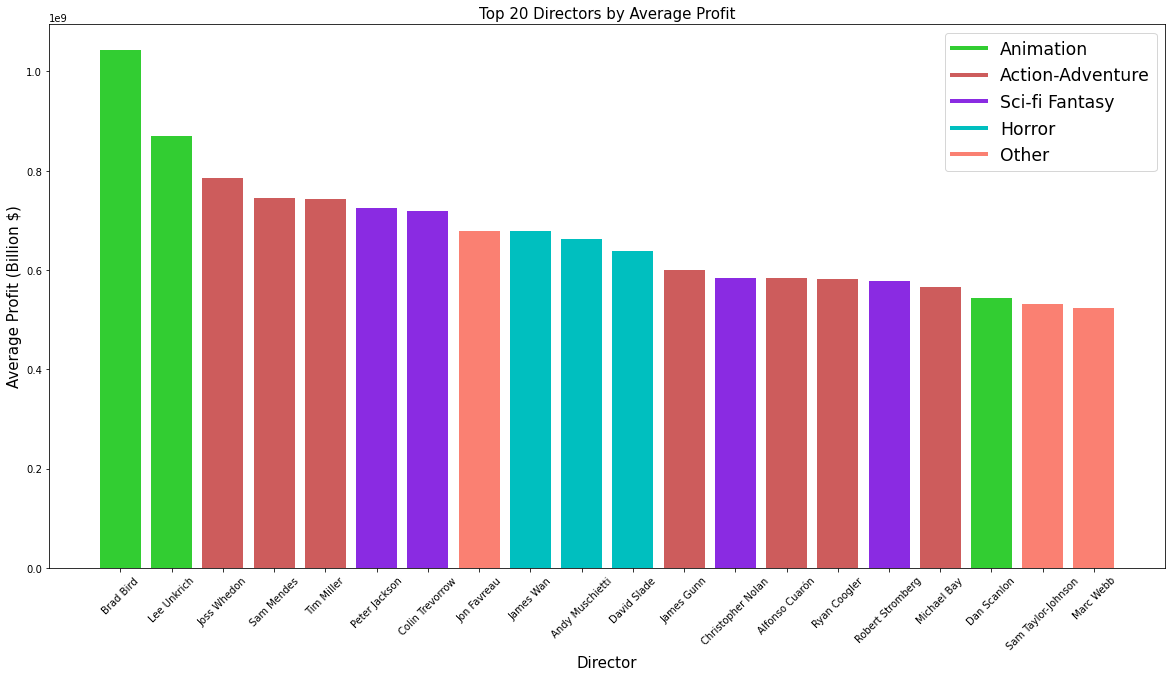

In [41]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))

color_index = ['limegreen','limegreen','indianred','indianred',
               'indianred','blueviolet','blueviolet','salmon','c','c','c',
               'indianred','blueviolet','indianred','indianred','blueviolet',
               'indianred','limegreen','salmon','salmon']
ax.bar(directors_group_top_profit.index, directors_group_top_profit['profit'],color = color_index)

# Add labels for x and y axes
ax.set_xlabel('Director', fontsize = 15)
ax.set_ylabel('Average Profit (Billion $)', fontsize = 15)

#setting color
custom_lines = [Line2D([0], [0], color="limegreen", lw=4),
                Line2D([0], [0], color="indianred", lw=4),
                Line2D([0], [0], color="blueviolet", lw=4),
                Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color ="salmon",lw=4)]

# Add a title for the plot
ax.set_title('Top 20 Directors by Average Profit', fontsize=15)

ax.tick_params(axis='x', labelrotation = 45)

# add a legend 
plt.legend(custom_lines, ['Animation', 'Action-Adventure', 'Sci-fi Fantasy','Horror', 'Other'], fontsize="xx-large")

###
fig.savefig('Top_20_directors.pdf')

In [43]:
df = pd.read_csv('Final_data.csv.gz',compression='gzip')

In [44]:
#format string 'known_ratings' to list
def to_int(in_string):
    out = []
    hold_string = in_string;
    try:
        if len(hold_string) == 2:
            return np.NaN
        elif len(hold_string) == 7:
            int_val = in_string[2:5];
            out.append(float(int_val));
        elif len(hold_string) == 14:
            int_val = in_string[2:5];
            out.append (float(int_val));
            int_val_2 = in_string[9:12]
            out.append (float(int_val_2));
        elif len(hold_string) == 21:
            int_val = in_string[2:5];
            out.append (float(int_val));
            int_val_2 = in_string[9:12]
            out.append (float(int_val_2));
            int_val_3 = in_string[16:19];
            out.append(float(int_val_3));
        else:
            int_val = in_string[2:5];
            out.append (float(int_val));
            int_val_2 = in_string[9:12]
            out.append (float(int_val_2));
            int_val_3 = in_string[16:19];
            out.append (float(int_val_3));
            int_val_4 = in_string[23:26];
            out.append(float(int_val_4))
        return out;
    except:
        return np.NaN;
df['known_ratings'] = df['known_ratings'].apply(to_int)

In [45]:
#calculate ratings statistics
def get_avg(in_list):
    return np.average(in_list);

def get_max(in_list):
    return np.amax(in_list);

def get_min(in_list):
    return np.amin(in_list);

df['rate_avg'] = df['known_ratings'].apply(get_avg)
df['rate_max'] = df['known_ratings'].apply(get_max)
df['rate_min'] = df['known_ratings'].apply(get_min)

In [46]:
#group by director
df_grouped = df.groupby(by=['nconst']).mean()
df_grouped.head()

,id,production_budget,domestic_gross,worldwide_gross,profit,return_rate,rate_avg,rate_max,rate_min
nconst,,,,,,,,,
nm0000095,58.333333,1.816667e+07,17779013.0,7.049560e+07,5.232893e+07,2.819199,7.925,8.0,7.9
nm0000108,90.000000,1.800000e+08,40479370.0,2.150984e+08,3.509836e+07,0.194991,7.475,8.5,6.4
nm0000110,87.333333,8.833333e+07,111478193.0,3.088756e+08,2.205423e+08,2.824880,7.250,7.7,6.5
nm0000123,45.000000,4.650000e+07,59497077.0,1.182193e+08,7.171934e+07,1.823502,6.950,7.4,6.1
nm0000127,61.500000,3.250000e+07,26462681.5,5.635853e+07,2.385853e+07,0.534419,6.925,7.5,6.4


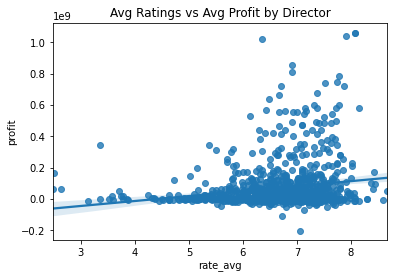

In [47]:
#create regression
ax = sns.regplot(x='rate_avg', y = 'profit',data=df_grouped)
ax.set_title('Avg Ratings vs Avg Profit by Director')
fig = ax.get_figure()
fig.savefig('Profit_by_Ratings.pdf')